In [11]:
# Step 1: Import Necessary Libraries

import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [2]:
## Step 2: Load the main dataset

df = pd.read_csv('test_amarmv.csv')

# Load the dataset with predicted positions
predicted_positions_df = pd.read_csv('predicted_positions_with_all_metrics.csv')

# Merge the datasets based on player names
df = df.merge(predicted_positions_df[['Player', 'Predicted Position']], on='Player', how='left')



df.head()

,Player,Team,Position 1,Age,Market value,Birth country,Height,Weight,Goals,xG,...,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Conceded goals,Shots against,xG against,Prevented goals,Search Results Count,Predicted Position
0,Hugo Bueno,Wolverhampton Wanderers,LB,20,200000,Spain,180,73,0,0.14,...,0.33,0.33,0.94,4.68,0,0,0.0,0.0,54000,LB
1,Jonny Otto,Wolverhampton Wanderers,RB,29,17000000,Spain,175,70,1,0.27,...,0.39,0.33,0.33,6.87,0,0,0.0,0.0,109000,RB
2,C. Dawson,Wolverhampton Wanderers,CB,33,2500000,England,188,78,1,2.09,...,0.38,0.13,0.00,7.92,0,0,0.0,0.0,133000,CB
3,Matheus Nunes,Wolverhampton Wanderers,AMF,24,45000000,Brazil,184,78,1,2.85,...,0.54,0.40,0.40,3.76,0,0,0.0,0.0,27200,CM
4,R. Aït Nouri,Wolverhampton Wanderers,LB,21,22000000,France,180,70,1,1.24,...,0.55,0.71,0.55,6.46,0,0,0.0,0.0,4220,LB


In [3]:
# Remove rows where 'Market value' is 0
df = df[df['Market value'] != 0]

# Remove duplicates
df = df.drop_duplicates(subset='Player', keep='first')


In [4]:
## Step 3: Scale Metrics

# List of columns to scale
columns_to_scale = [column_name for column_name in df.columns if column_name not in ['Player', 'Team', 'Position 1', 'Birth country', 'Player', 'Market value', 'Predicted Position', 'Search Results Count']]


# Initialise the scaler
scaler = StandardScaler()

# Scale the columns
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,Player,Team,Position 1,Age,Market value,Birth country,Height,Weight,Goals,xG,...,Through passes per 90,Deep completions per 90,Deep completed crosses per 90,Progressive passes per 90,Conceded goals,Shots against,xG against,Prevented goals,Search Results Count,Predicted Position
0,Hugo Bueno,Wolverhampton Wanderers,LB,-1.677069,200000,Spain,-0.385427,-0.418560,-0.714332,-0.789252,...,-0.589223,-0.544110,1.207799,-0.437432,-0.263745,-0.266675,-0.264417,-0.001766,54000,LB
1,Jonny Otto,Wolverhampton Wanderers,RB,0.525371,17000000,Spain,-1.128861,-0.838650,-0.421416,-0.747505,...,-0.463586,-0.544110,-0.170334,0.398427,-0.263745,-0.266675,-0.264417,-0.001766,109000,RB
2,C. Dawson,Wolverhampton Wanderers,CB,1.504232,2500000,England,0.804068,0.281591,-0.421416,-0.163046,...,-0.484526,-0.895942,-0.915881,0.799181,-0.263745,-0.266675,-0.264417,-0.001766,133000,CB
3,Matheus Nunes,Wolverhampton Wanderers,AMF,-0.698207,45000000,Brazil,0.209321,0.281591,-0.421416,0.081014,...,-0.149493,-0.420969,-0.012187,-0.788569,-0.263745,-0.266675,-0.264417,-0.001766,27200,CM
4,R. Aït Nouri,Wolverhampton Wanderers,LB,-1.432353,22000000,France,-0.385427,-0.838650,-0.421416,-0.436008,...,-0.128553,0.124370,0.326698,0.241942,-0.263745,-0.266675,-0.264417,-0.001766,4220,LB


In [5]:
## Step 4: Define Coefficients and R-squared Values (from linear regressions)

# Define your coefficients and R-squared values here

performance_coeffs = {'Goals': 4965000.0,
    'xA': 2540000.0,
    'Defensive duels per 90': -1379000.0,
    'Aerial duels per 90': -1028000.0,
    'Sliding tackles per 90': 281000.0,
    'Shots blocked per 90': -605100.0,
    'PAdj Interceptions': 2174000.0,
    'xG per 90': 2049000.0,
    'Shots per 90': -1138000.0,
    'Assists per 90': 1325000.0,
    'Crosses from left flank per 90': -2135000.0,
    'Crosses from right flank per 90': -2269000.0,
    'Crosses to goalie box per 90': -359600.0,
    'Dribbles per 90': 1517000.0,
    'Progressive runs per 90': -389500.0,
    'Accelerations per 90': 2159000.0,
    'Received long passes per 90': 1113000.0,
    'Forward passes per 90': 1362000.0,
    'Back passes per 90': 1780000.0,
    'Lateral passes per 90': 5455000.0,
    'Long passes per 90': -1523000.0,
    'Average long pass length, m': 450600.0,
    'Shot assists per 90': -4093000.0,
    'Second assists per 90': 807800.0,
    'Key passes per 90': 2390000.0,
    'Passes to final third per 90': -999400.0,
    'Through passes per 90': 810900.0,
    'Deep completions per 90': 938500.0,
    'xG against': 2928000.0,
    'Prevented goals': 68570.0}

non_performance_coeffs = {'Age': -4575000.0,
    'Height': -90760.0,
    'Weight': 1325000.0}

popularity_coeffs = {"Search Results Count": 75.7573,}

position_coeffs = {'CB': -841300.0,
    'CF': 4368000.0,
    'CM': 1140000.0,
    'DMF': 4117000.0,
    'LB': -1036000.0,
    'LW': 4626000.0,
    'LWB': -1816000.0,
    'RB': -2559000.0,
    'RW': 2532000.0,
    'RWB': -633100.0,
    'AMF': 2648000.0,
    'GK': -1481000.0

}

performance_r2 = 0.341
non_performance_r2 = 0.053
popularity_r2 = 0.081

In [6]:
#add position coeffs
non_performance_coeffs.update(position_coeffs)


In [7]:
## Step 5: Calculate Adjustments and AMV

def compute_individual_adjustment(row, coefficients, r2):
    """Compute the adjustment for a given row and set of coefficients."""
    adjustment = 0
    
    # For each coefficient in the coefficients dictionary
    for feature, coeff in coefficients.items():
        # If the feature is a position (e.g., 'LW', 'CF', etc.), use the 'Predicted Position' column
        if feature in position_coeffs:
            if row['Predicted Position'] == feature:
                adjustment += coeff
        # Otherwise, use the value from the respective column
        else:
            adjustment += row[feature] * coeff
            
    return adjustment * r2

# Calculate individual adjustments and AMV
df['Performance_Impact'] = df.apply(lambda row: compute_individual_adjustment(row, performance_coeffs, performance_r2), axis=1)
df['Non_Performance_Impact'] = df.apply(lambda row: compute_individual_adjustment(row, non_performance_coeffs, non_performance_r2), axis=1)
df['Popularity_Impact'] = df.apply(lambda row: compute_individual_adjustment(row, popularity_coeffs, popularity_r2), axis=1)


df['AMV'] = df['Market value'] + df['Performance_Impact'] + df['Non_Performance_Impact'] + df['Popularity_Impact']


In [8]:
#step 6, save results

df.to_csv('results.csv', index=False)

In [9]:
# Load the CSV file into a DataFrame
df = pd.read_csv('results.csv')

# Display the first few rows of the DataFrame
df.head()

,Player,Team,Position 1,Age,Market value,Birth country,Height,Weight,Goals,xG,...,Conceded goals,Shots against,xG against,Prevented goals,Search Results Count,Predicted Position,Performance_Impact,Non_Performance_Impact,Popularity_Impact,AMV
0,Hugo Bueno,Wolverhampton Wanderers,LB,-1.677069,200000,Spain,-0.385427,-0.418560,-0.714332,-0.789252,...,-0.263745,-0.266675,-0.264417,-0.001766,54000,LB,-2.569887e+06,324199.869878,331362.430200,-1.714325e+06
1,Jonny Otto,Wolverhampton Wanderers,RB,0.525371,17000000,Spain,-1.128861,-0.838650,-0.421416,-0.747505,...,-0.263745,-0.266675,-0.264417,-0.001766,109000,RB,-1.403712e+06,-316480.299967,668861.201700,1.594867e+07
2,C. Dawson,Wolverhampton Wanderers,CB,1.504232,2500000,England,0.804068,0.281591,-0.421416,-0.163046,...,-0.263745,-0.266675,-0.264417,-0.001766,133000,CB,-1.330489e+06,-393420.736264,816133.392900,1.592224e+06
3,Matheus Nunes,Wolverhampton Wanderers,AMF,-0.698207,45000000,Brazil,0.209321,0.281591,-0.421416,0.081014,...,-0.263745,-0.266675,-0.264417,-0.001766,27200,CM,-8.188912e+05,248485.514623,166908.483360,4.459650e+07
4,R. Aït Nouri,Wolverhampton Wanderers,LB,-1.432353,22000000,France,-0.385427,-0.838650,-0.421416,-0.436008,...,-0.263745,-0.266675,-0.264417,-0.001766,4220,LB,-1.467233e+05,235361.639000,25895.360286,2.211453e+07


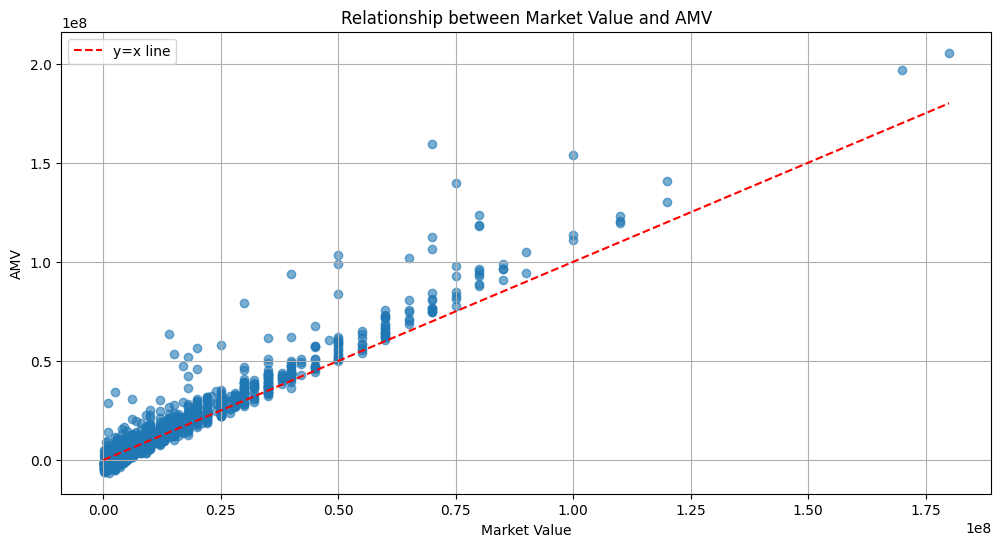

In [13]:
# Scatter plot to visualize the relationship between 'Market value' and 'Calculated_AMV'
plt.figure(figsize=(12, 6))
plt.scatter(df['Market value'], df['AMV'], alpha=0.6)
plt.plot([df['Market value'].min(), df['Market value'].max()],
         [df['Market value'].min(), df['Market value'].max()], 'r--', label='y=x line')
plt.title('Relationship between Market Value and AMV')
plt.xlabel('Market Value')
plt.ylabel('AMV')
plt.legend()
plt.grid(True)
plt.show()